In [100]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [101]:
df = pd.read_csv("/home/jovyan/log_reg/data/cleaned_admission_data.csv") 

In [ ]:
df.Admit = df.Admit.replace('\s+', ' ', regex=True)

In [102]:
df.head()

,Enroll,Admit,Deposit,F,Ethnicity,Region Description,Age,ACT Category Description,College,Major,Convert_GPA_Fix,FIN_AID_INTEREST
0,False,False,False,F,White,Chicago Central,62.0,Unknown,Liberal Arts & Social Sciences,UGRD Undeclared TBD,NaN,Y
1,False,False,False,F,Multiracial,Chicago Far South,23.0,Unknown,Commerce,Business Administration,NaN,N
2,False,False,False,F,Hispanic,Chicago North,25.0,16-19,Commerce,Management,NaN,N
3,False,False,False,F,White,Out of State,19.0,Unknown,Commerce,Business Administration,4.1,N
4,False,False,True,F,Hispanic,Suburban West,23.0,20-23,Science and Health,Psychology,NaN,Y


In [103]:
df.Deposit.unique()

array([False, True], dtype=object)

In [104]:
df.Ethnicity.unique()

array(['White', 'Multiracial', 'Hispanic', 'Asian/Pacific Islander',
       'Black', 'Not Applicable', 'International',
       'American Indian/Alaskan Native', 'Native Hawaiian/Oth Pac Island'], dtype=object)

In [105]:
df.Age.unique()

array([ 62.,  23.,  25.,  19.,  22.,  42.,  18.,  20.,  nan,  17.,  24.,
        16.,  21.,  27.,   1.,  33.,  49.,  14.,  30.,  28.,  26.,  29.,
        31.,  48.])

In [106]:
df['Age'] = df['Age'].replace('NaN', 0)

In [107]:
df.head()

,Enroll,Admit,Deposit,F,Ethnicity,Region Description,Age,ACT Category Description,College,Major,Convert_GPA_Fix,FIN_AID_INTEREST
0,False,False,False,F,White,Chicago Central,62.0,Unknown,Liberal Arts & Social Sciences,UGRD Undeclared TBD,NaN,Y
1,False,False,False,F,Multiracial,Chicago Far South,23.0,Unknown,Commerce,Business Administration,NaN,N
2,False,False,False,F,Hispanic,Chicago North,25.0,16-19,Commerce,Management,NaN,N
3,False,False,False,F,White,Out of State,19.0,Unknown,Commerce,Business Administration,4.1,N
4,False,False,True,F,Hispanic,Suburban West,23.0,20-23,Science and Health,Psychology,NaN,Y


In [108]:
df['ACT Category Description'].unique()

array(['Unknown', '16-19', '20-23', '0-15', '24-27', '33-36', '28-32'], dtype=object)

In [109]:
df.Convert_GPA_Fix.unique()

array([   nan,  4.1  ,  2.538, ...,  1.911,  1.556,  1.66 ])

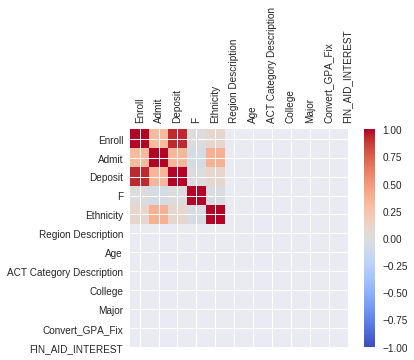

In [110]:
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18197 entries, 0 to 18196
Data columns (total 12 columns):
Enroll                      18197 non-null bool
Admit                       18197 non-null bool
Deposit                     18197 non-null bool
F                           18197 non-null object
Ethnicity                   18197 non-null object
Region Description          18197 non-null object
Age                         18197 non-null float64
ACT Category Description    18197 non-null object
College                     18092 non-null object
Major                       18099 non-null object
Convert_GPA_Fix             16023 non-null float64
FIN_AID_INTEREST            18098 non-null object
dtypes: bool(3), float64(2), object(7)
memory usage: 1.3+ MB


In [112]:
df.corr(method='spearman')

,Enroll,Admit,Deposit,Age,Convert_GPA_Fix
Enroll,1.000000,0.318503,0.932718,0.003602,0.081825
Admit,0.318503,1.000000,0.339145,-0.053613,0.392140
Deposit,0.932718,0.339145,1.000000,0.004636,0.078477
Age,0.003602,-0.053613,0.004636,1.000000,-0.037479
Convert_GPA_Fix,0.081825,0.392140,0.078477,-0.037479,1.000000


In [113]:
df['Enroll'].value_counts()

False    15601
True      2596
Name: Enroll, dtype: int64

In [114]:
print(df.isnull().sum())

Enroll                         0
Admit                          0
Deposit                        0
F                              0
Ethnicity                      0
Region Description             0
Age                            0
ACT Category Description       0
College                      105
Major                         98
Convert_GPA_Fix             2174
FIN_AID_INTEREST              99
dtype: int64


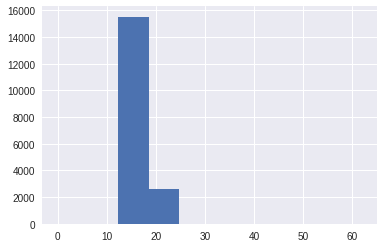

In [115]:
df['Age'].hist(bins=10)

In [117]:
le = preprocessing.LabelEncoder()
df['Ethnicity'] = le.fit_transform(df['Ethnicity'])




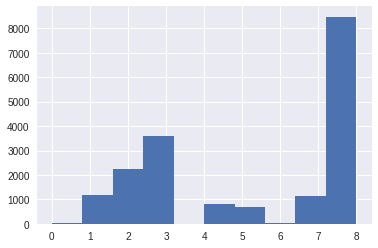

In [118]:
df['Ethnicity'].hist(bins=10)

In [120]:
df.head()

,Enroll,Admit,Deposit,F,Ethnicity,Region Description,Age,ACT Category Description,College,Major,Convert_GPA_Fix,FIN_AID_INTEREST
0,False,False,False,F,8,Chicago Central,62.0,Unknown,Liberal Arts & Social Sciences,UGRD Undeclared TBD,NaN,Y
1,False,False,False,F,5,Chicago Far South,23.0,Unknown,Commerce,Business Administration,NaN,N
2,False,False,False,F,3,Chicago North,25.0,16-19,Commerce,Management,NaN,N
3,False,False,False,F,8,Out of State,19.0,Unknown,Commerce,Business Administration,4.1,N
4,False,False,True,F,3,Suburban West,23.0,20-23,Science and Health,Psychology,NaN,Y


In [121]:
le = preprocessing.LabelEncoder()
df['Enroll'] = le.fit_transform(df['Enroll'])

In [122]:
le = preprocessing.LabelEncoder()
df['Admit'] = le.fit_transform(df['Admit'])

In [123]:
le = preprocessing.LabelEncoder()
df['Deposit'] = le.fit_transform(df['Deposit'])

In [124]:
df.head()

,Enroll,Admit,Deposit,F,Ethnicity,Region Description,Age,ACT Category Description,College,Major,Convert_GPA_Fix,FIN_AID_INTEREST
0,0,0,0,F,8,Chicago Central,62.0,Unknown,Liberal Arts & Social Sciences,UGRD Undeclared TBD,NaN,Y
1,0,0,0,F,5,Chicago Far South,23.0,Unknown,Commerce,Business Administration,NaN,N
2,0,0,0,F,3,Chicago North,25.0,16-19,Commerce,Management,NaN,N
3,0,0,0,F,8,Out of State,19.0,Unknown,Commerce,Business Administration,4.1,N
4,0,0,1,F,3,Suburban West,23.0,20-23,Science and Health,Psychology,NaN,Y


In [125]:
# Check for null
df.isnull().sum()

Enroll                         0
Admit                          0
Deposit                        0
F                              0
Ethnicity                      0
Region Description             0
Age                            0
ACT Category Description       0
College                      105
Major                         98
Convert_GPA_Fix             2174
FIN_AID_INTEREST              99
dtype: int64

In [ ]:
# Bar plot fot dependent varaiable

In [143]:
df.Admit = df.Admit.replace('\s+', ' ', regex=True)

In [144]:
df.Deposit = df.Deposit.replace('\s+', ' ', regex=True)

In [145]:
df.Age = df.Age.replace('\s+', ' ', regex=True)

In [156]:
df.Enroll = df.Enroll.replace('\s+', ' ', regex=True)

In [157]:
df.Age.unique()

array([ 62.,  23.,  25.,  19.,  22.,  42.,  18.,  20.,   0.,  17.,  24.,
        16.,  21.,  27.,   1.,  33.,  49.,  14.,  30.,  28.,  26.,  29.,
        31.,  48.])

In [158]:
X = df[['Admit', 'Deposit', 'Age']]
y = df['Enroll']

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [160]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [161]:
predictions = lm.predict(X_test)

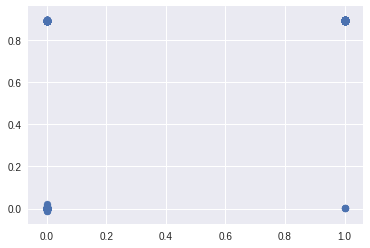

In [162]:
plt.scatter(y_test,predictions)

In [163]:
X = df.iloc[:,1:]
y = df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [169]:
X = df[['Admit', 'Deposit', 'Age']]
y = df['Enroll']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [170]:
X_train.shape

(13647, 3)

In [168]:
df.dtypes

Enroll                        int64
Admit                         int64
Deposit                       int64
F                            object
Ethnicity                     int64
Region Description           object
Age                         float64
ACT Category Description     object
College                      object
Major                        object
Convert_GPA_Fix             float64
FIN_AID_INTEREST             object
dtype: object

In [171]:
est = sm.Logit(y, X.astype(float)).fit()

Optimization terminated successfully.
         Current function value: 0.059034
         Iterations 12


In [172]:
print(est.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.856    
Dependent Variable: Enroll           AIC:              2154.5005
Date:               2018-11-12 01:04 BIC:              2177.9276
No. Observations:   18197            Log-Likelihood:   -1074.3  
Df Model:           2                LL-Null:          -7456.5  
Df Residuals:       18194            LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     12.0000                                     
-----------------------------------------------------------------
             Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-----------------------------------------------------------------
Admit        1.1377    0.5618    2.0250  0.0429   0.0366   2.2387
Deposit      9.1297    0.3448   26.4801  0.0000   8.4539   9.8054
Age         -0.4490    0.0294  -15.2779  0.0000  -0.5066  -0.3914



In [154]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [95]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

ValueError: could not convert string to float: 'Y'

In [ ]:
df.Convert_GPA_Fix.unique()